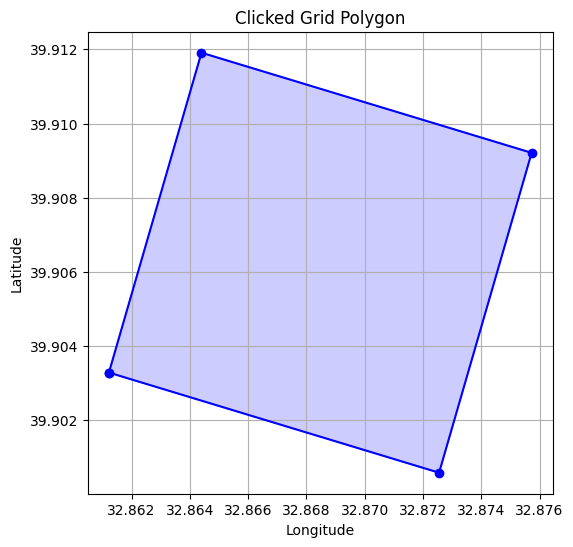

In [3]:
import matplotlib.pyplot as plt

# Separate x and y for plotting
lons, lats = zip(*coords)

plt.figure(figsize=(6, 6))
plt.plot(lons, lats, marker='o', linestyle='-', color='blue')
plt.fill(lons, lats, alpha=0.2, color='blue')
plt.title("Clicked Grid Polygon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [4]:
square1 = [
    [32.8901481628418, 39.915068820438904],
    [32.89332389831543, 39.92369224734412],
    [32.90456771850586, 39.9209934289579],
    [32.90139198303223, 39.91236966217849],
    [32.8901481628418, 39.915068820438904]
]

square2 = [
    [32.898216247558594, 39.90381065218091],
    [32.90139198303223, 39.91236966217849],
    [32.912635803222656, 39.90967039754898],
    [32.90946006774902, 39.901111050295526],
    [32.898216247558594, 39.90381065218091]
]

def normalize(square):
    return square[:-1]  # remove the repeated last point


In [5]:
import numpy as np

def to_vec(p1, p2):
    return np.array(p2) - np.array(p1)

v1 = normalize(square1)
v2 = normalize(square2)

# Find common point
shared = list(set(map(tuple, v1)) & set(map(tuple, v2)))
if len(shared) != 1:
    raise ValueError("Expected one shared corner, got:", shared)

shared = np.array(shared[0])

# Get direction vectors (approximate)
vec1 = np.mean([to_vec(shared, p) for p in v1 if not np.allclose(p, shared)], axis=0)
vec2 = np.mean([to_vec(shared, p) for p in v2 if not np.allclose(p, shared)], axis=0)

# Two orthogonal directions
step_col = vec1 - vec2
step_row = vec1 + vec2


In [6]:
def shift(square, vec):
    return [[x + vec[0], y + vec[1]] for [x, y] in square] + [[square[0][0] + vec[0], square[0][1] + vec[1]]]


In [7]:
from itertools import product

neighbors = []
for dx, dy in product([-1, 0, 1], repeat=2):
    if dx == 0 and dy == 0:
        continue  # skip the original
    shift_vec = dx * step_col + dy * step_row
    neighbors.append(shift(square1, shift_vec))


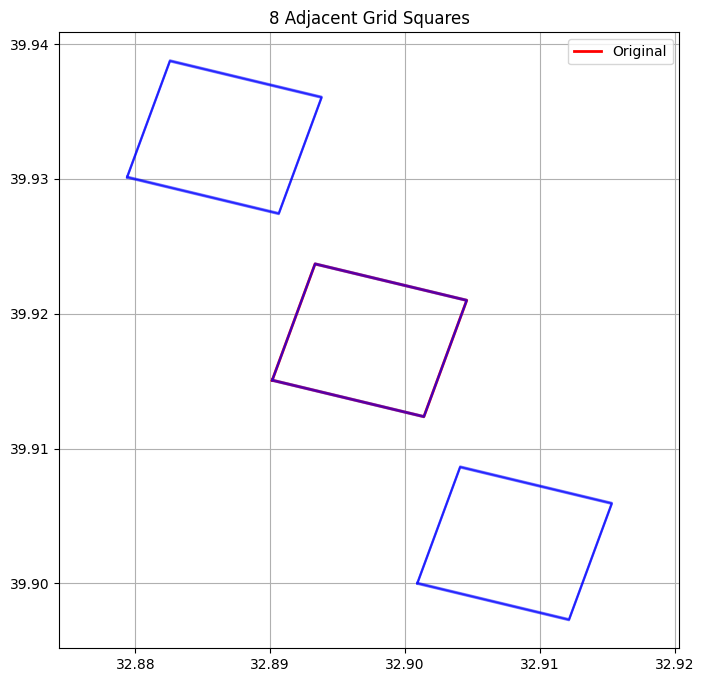

In [8]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

plt.figure(figsize=(8, 8))
ax = plt.gca()

# Plot original
poly = Polygon(normalize(square1))
x, y = poly.exterior.xy
plt.plot(x, y, color='red', linewidth=2, label='Original')

# Plot neighbors
for sq in neighbors:
    poly = Polygon(sq[:-1])
    x, y = poly.exterior.xy
    plt.plot(x, y, color='blue', alpha=0.5)

plt.legend()
plt.axis('equal')
plt.grid(True)
plt.title("8 Adjacent Grid Squares")
plt.show()


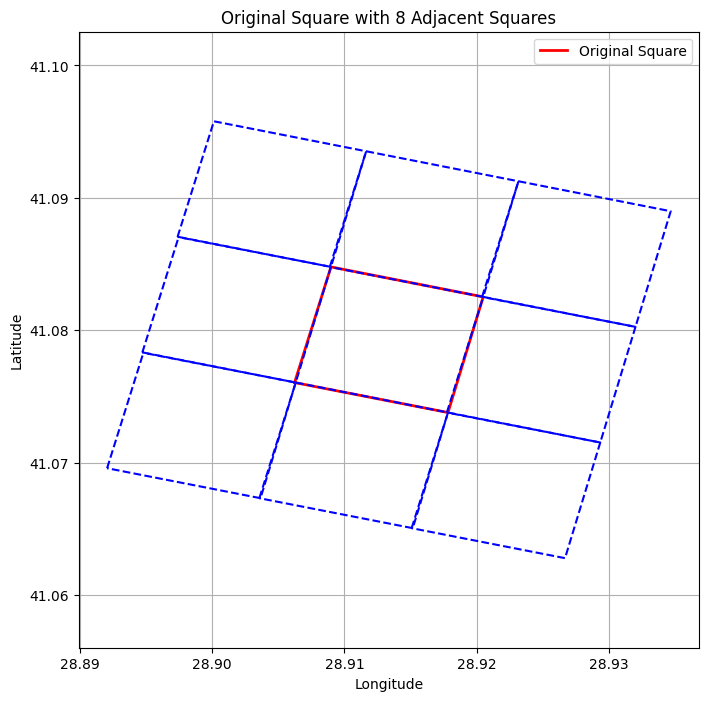

In [12]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

# Base square: square1 (remove the closing point)
square1 = [
    [
      28.906230926513672,
      41.07605140770576
    ],
    [
      28.908977508544922,
      41.084785657147336
    ],
    [
      28.92047882080078,
      41.082521333560635
    ],
    [
      28.917818069458008,
      41.07378678319674
    ],
    [
      28.906230926513672,
      41.07605140770576
    ]
  ]

# Convert to numpy array for vector math
square_np = np.array(square1)

# Compute approximate direction vectors
vec_right = square_np[2] - square_np[1]   # from top-right to bottom-right
vec_down = square_np[3] - square_np[2]    # from bottom-right to bottom-left

# Generate 8 adjacent squares by combining shifts
shifts = [(-1, -1), (0, -1), (1, -1),
          (-1,  0),         (1,  0),
          (-1,  1), (0,  1), (1,  1)]

adjacent_squares = []

for dx, dy in shifts:
    shift_vector = dx * vec_right + dy * vec_down
    new_square = (square_np + shift_vector).tolist()
    new_square.append(new_square[0])  # close the polygon
    adjacent_squares.append(new_square)

# Also close the base square
square1_closed = square1 + [square1[0]]

# Plot everything
plt.figure(figsize=(8, 8))

# Plot base square
base_poly = Polygon(square1_closed)
x, y = base_poly.exterior.xy
plt.plot(x, y, color='red', linewidth=2, label='Original Square')

# Plot adjacent squares
for sq in adjacent_squares:
    poly = Polygon(sq)
    x, y = poly.exterior.xy
    plt.plot(x, y, color='blue', linestyle='--')

plt.title("Original Square with 8 Adjacent Squares")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


In [18]:
import pandas as pd
import numpy as np

# Original square (without closing point)
square1 = [
    [32.8901481628418, 39.915068820438904],
    [32.89332389831543, 39.92369224734412],
    [32.90456771850586, 39.9209934289579],
    [32.90139198303223, 39.91236966217849]
]

# Convert to numpy array for math
square_np = np.array(square1)

# Approximate direction vectors (right and down)
vec_right = square_np[2] - square_np[1]
vec_down = square_np[3] - square_np[2]

# 8-directional shifts (row-wise from top-left)
shifts = [(-1, -1), (0, -1), (1, -1),
          (-1,  0),         (1,  0),
          (-1,  1), (0,  1), (1,  1)]

# Generate adjacent squares
adjacent_squares = []
for dx, dy in shifts:
    shift_vec = dx * vec_right + dy * vec_down
    new_square = (square_np + shift_vec).tolist()
    new_square.append(new_square[0])  # close the polygon
    adjacent_squares.append(new_square)

# Numbered labels
square_labels = [f"Square {i+1}" for i in range(8)]

# Create DataFrame
df_data = []
for label, coords in zip(square_labels, adjacent_squares):
    coord_str = '; '.join([f"[{round(lon, 6)}, {round(lat, 6)}]" for lon, lat in coords])
    df_data.append({'Square': label, 'Coordinates': coord_str})

df = pd.DataFrame(df_data)

# Print result
print(df.to_string(index=False))


  Square                                                                                                            Coordinates
Square 1     [32.88208, 39.926391]; [32.885256, 39.935015]; [32.8965, 39.932316]; [32.893324, 39.923692]; [32.88208, 39.926391]
Square 2   [32.893324, 39.923693]; [32.8965, 39.932316]; [32.907743, 39.929617]; [32.904568, 39.920993]; [32.893324, 39.923693]
Square 3 [32.904568, 39.920994]; [32.907743, 39.929617]; [32.918987, 39.926918]; [32.915812, 39.918295]; [32.904568, 39.920994]
Square 4  [32.878904, 39.917768]; [32.88208, 39.926391]; [32.893324, 39.923692]; [32.890148, 39.915068]; [32.878904, 39.917768]
Square 5   [32.901392, 39.91237]; [32.904568, 39.920993]; [32.915812, 39.918295]; [32.912636, 39.909671]; [32.901392, 39.91237]
Square 6 [32.875729, 39.909144]; [32.878904, 39.917767]; [32.890148, 39.915068]; [32.886972, 39.906445]; [32.875729, 39.909144]
Square 7  [32.886972, 39.906445]; [32.890148, 39.915068]; [32.901392, 39.91237]; [32.898216, 39.903746];

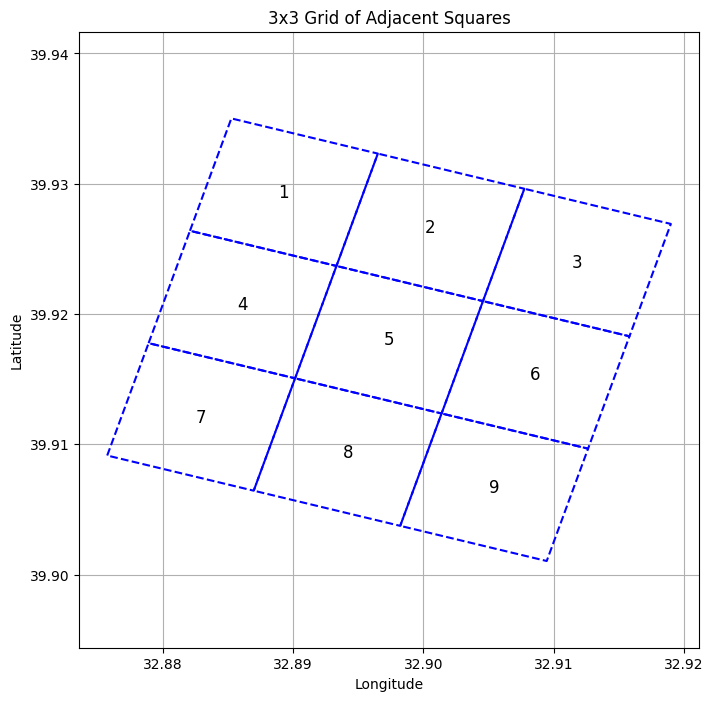

In [19]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

# Original center square (without closing point)
square1 = [
    [32.8901481628418, 39.915068820438904],
    [32.89332389831543, 39.92369224734412],
    [32.90456771850586, 39.9209934289579],
    [32.90139198303223, 39.91236966217849]
]

# Convert to numpy array
square_np = np.array(square1)

# Estimate right and down vectors based on corners
vec_right = square_np[2] - square_np[1]
vec_down = square_np[3] - square_np[2]

# Define 3x3 grid shifts (row-wise from top-left)
shifts = [(dx, dy) for dy in [-1, 0, 1] for dx in [-1, 0, 1]]

# Generate all 9 squares
all_squares = []
centroids = []

for dx, dy in shifts:
    shift_vec = dx * vec_right + dy * vec_down
    new_square = (square_np + shift_vec).tolist()
    new_square.append(new_square[0])  # close the polygon
    all_squares.append(new_square)
    poly = Polygon(new_square)
    centroids.append(poly.centroid.coords[0])

# Plot
plt.figure(figsize=(8, 8))

for idx, (square, center) in enumerate(zip(all_squares, centroids), start=1):
    poly = Polygon(square)
    x, y = poly.exterior.xy
    plt.plot(x, y, color='blue', linestyle='--')
    plt.text(center[0], center[1], f"{idx}", fontsize=12, ha='center', va='center', color='black')

plt.title("3x3 Grid of Adjacent Squares")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis('equal')
plt.grid(True)
plt.show()


In [2]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# Setup Chrome
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get("https://cip.tuik.gov.tr/")

# Give page some time to load
time.sleep(5)

# Step 1: Hook into MapLibre and store map reference
map_hook = """
(() => {
  const OriginalMap = window.Map;
  window.Map = function (...args) {
    const instance = new OriginalMap(...args);
    setTimeout(() => {
      if (typeof instance.getZoom === 'function' && typeof instance.queryRenderedFeatures === 'function') {
        console.log('✅ Hooked map instance');
        window.__my_map = instance;
      }
    }, 1000);
    return instance;
  };
})();
"""
driver.execute_script(map_hook)
print("✅ Hook injection sent. Waiting for map...")

# Step 2: Wait until map is hooked
for i in range(30):
    if driver.execute_script("return typeof window.__my_map !== 'undefined';"):
        print("✅ Map object available.")
        break
    time.sleep(1)
else:
    driver.quit()
    raise Exception("❌ Failed to hook into map.")

# Step 3: Inject JS for hover capture
inject_hover = """
window.__hoveredFeatures = [];

__my_map.on('mousemove', (e) => {
  const features = __my_map.queryRenderedFeatures(e.point, {
    layers: ['grid_katmani']
  });
  if (features.length > 0) {
    const f = features[0];
    const coords = f.geometry.coordinates;
    const props = f.properties;
    const id = props.gridid || JSON.stringify(coords);
    if (!window.__hoveredFeatures.find(entry => entry.id === id)) {
      window.__hoveredFeatures.push({
        id,
        timestamp: Date.now(),
        coordinates: coords,
        properties: props
      });
      console.log("🟢 Captured new square", id);
    }
  }
});
"""
driver.execute_script(inject_hover)
print("🟢 Hover listener injected. Hover over the squares...")

# Step 4: Hover phase (you can change duration)
hover_duration = 60  # seconds
print(f"⏳ Hover over the map for {hover_duration} seconds...")
time.sleep(hover_duration)

# Step 5: Pull the hovered features
try:
    data = driver.execute_script("return window.__hoveredFeatures;")
except Exception as e:
    print("❌ Could not retrieve features. Make sure the window stayed open.")
    driver.quit()
    raise e

# Now safe to close browser
driver.quit()


# Step 6: Save to CSV
if data:
    rows = []
    for item in data:
        flat = {
            'id': item['id'],
            'timestamp': item['timestamp'],
            'geometry': item['coordinates'],
        }
        flat.update(item['properties'])
        rows.append(flat)

    df = pd.DataFrame(rows)
    df.to_csv("tuik_hover_data.csv", index=False)
    print(f"✅ Saved {len(df)} rows to tuik_hover_data.csv")
else:
    print("⚠️ No data was collected.")


WebDriverException: Message: Can not connect to the Service /Users/borangoksel/.wdm/drivers/chromedriver/mac64/133.0.6943.141/chromedriver-mac-arm64/chromedriver


Service process refused to terminate gracefully with SIGTERM, escalating to SIGKILL.
Traceback (most recent call last):
  File "/Users/borangoksel/Documents/GitHub/Çöplük/.venv/lib/python3.12/site-packages/selenium/webdriver/common/service.py", line 179, in _terminate_process
    self.process.wait(60)
  File "/Users/borangoksel/.pyenv/versions/3.12.3/lib/python3.12/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/borangoksel/.pyenv/versions/3.12.3/lib/python3.12/subprocess.py", line 2045, in _wait
    raise TimeoutExpired(self.args, timeout)
subprocess.TimeoutExpired: Command '['/Users/borangoksel/.wdm/drivers/chromedriver/mac64/133.0.6943.141/chromedriver-mac-arm64/chromedriver', '--port=51171']' timed out after 60 seconds


In [ ]:
import pandas as pd

def coords_to_wkt(coords):
    """
    Converts a list of coordinates [[[lon, lat], ...]] into WKT POLYGON string.
    """
    outer_ring = coords[0]
    point_strs = [f"{lon} {lat}" for lon, lat in outer_ring]
    # Ensure polygon is closed
    if point_strs[0] != point_strs[-1]:
        point_strs.append(point_strs[0])
    return f"POLYGON(({', '.join(point_strs)}))"

# Assuming `data` is already defined (your hovered square info)
records = []
for item in data:
    row = item["properties"].copy()
    row["geometry"] = coords_to_wkt(item["coordinates"])
    records.append(row)

# Convert to DataFrame
df = pd.DataFrame(records)

# Save as CSV (QGIS-compatible if you later import with geometry as WKT)
df.to_csv("hovered_grids.csv", index=False)
print("✅ Data saved as 'hovered_grids.csv'")


✅ Data saved as 'hovered_grids.csv'


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import json
import pyautogui
import pandas as pd

CHROMEDRIVER_PATH = "/Users/borangoksel/Downloads/chromedriver-mac-arm64/chromedriver"  # your chromedriver path

# Setup Selenium
options = Options()
options.add_argument("--start-maximized")
service = Service(CHROMEDRIVER_PATH)
driver = webdriver.Chrome(service=service, options=options)

# Load page
driver.get("https://cip.tuik.gov.tr/")

# Prompt to manually hook the map
print("🔓 Set breakpoint in DevTools (Sources > main.*.js) and run this in console:")
print("    window.__my_map = i.map;")
input("👉 After doing that, press Enter to inject hover listener...")

# Inject hover listener
hover_script = """
window.__hoveredFeatures = [];
__my_map.on('mousemove', (e) => {
  const features = __my_map.queryRenderedFeatures(e.point, {
    layers: ['grid_katmani']
  });
  if (features.length > 0) {
    const f = features[0];
    const id = JSON.stringify(f.geometry.coordinates);
    const alreadySeen = window.__hoveredFeatures.some(entry => JSON.stringify(entry.coordinates) === id);
    if (!alreadySeen) {
      window.__hoveredFeatures.push({
        timestamp: Date.now(),
        properties: f.properties,
        coordinates: f.geometry.coordinates
      });
      console.log("✅ Hover captured");
    }
  }
});
"""
driver.execute_script(hover_script)
while True:
    proceed = input("🟢 Start automatic hover sweep? (yes/no): ").strip().lower()
    if proceed != "yes":
        break

    print("⏳ You have 5 seconds to switch to the Chrome window...")
    time.sleep(8)

    screen_width, screen_height = pyautogui.size()
    step = 30  # finer resolution
    print("🕹️ Sweeping mouse across screen... (Press Ctrl+C to stop early)")

    try:
        for y in range(200, screen_height - 200, step):
            for x in range(200, screen_width - 200, step):
                pyautogui.moveTo(x, y)
                time.sleep(0.003)
    except KeyboardInterrupt:
        print("\n⛔ Sweep interrupted by user.")
        continue  # let user decide to run again or quit

    print("✅ Sweep complete.")


# Retrieve collected data
data = driver.execute_script("return window.__hoveredFeatures;")
driver.quit()

# Conve   rt to WKT format
def coords_to_wkt(coords):
    coords = coords[0]
    return "POLYGON((" + ", ".join([f"{x} {y}" for x, y in coords]) + "))"

records = []
for item in data:
    row = item["properties"].copy()
    row["geometry"] = coords_to_wkt(item["coordinates"])
    records.append(row)

# Save to CSV
df = pd.DataFrame(records)
df.to_csv("hovered_features.csv", index=False)
print("📁 Saved to hovered_features.csv")


🔓 Set breakpoint in DevTools (Sources > main.*.js) and run this in console:
    window.__my_map = i.map;
⏳ You have 5 seconds to switch to the Chrome window...
🕹️ Sweeping mouse across screen... (Press Ctrl+C to stop early)
✅ Sweep complete.
📁 Saved to hovered_features.csv


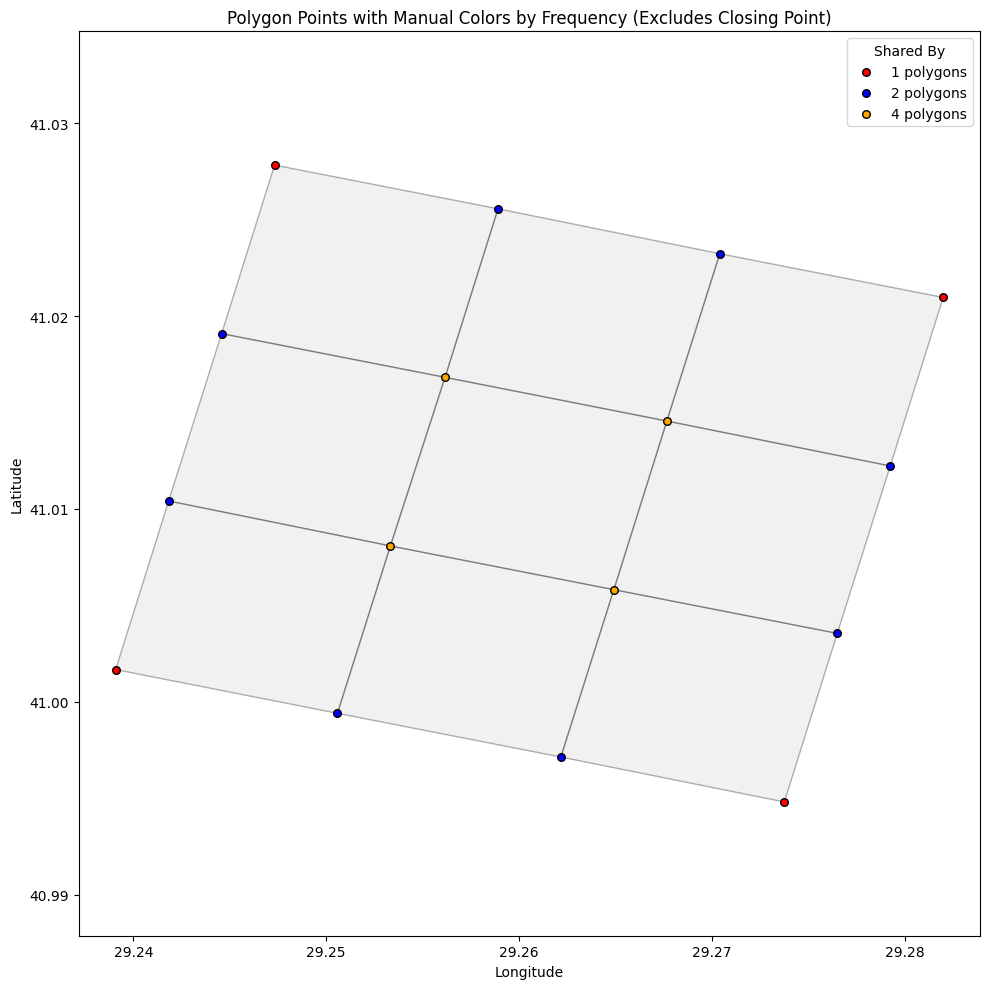

In [20]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from collections import defaultdict
import os

# --- Setup ---
folder_path = "/Users/borangoksel/Documents/GitHub/tuik_grid_scraper/unnecesary/"
csv_file = "test.csv"
full_path = os.path.join(folder_path, csv_file)

# --- Load and Parse Geometry ---
df = pd.read_csv(full_path)
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# --- Count Unique Points Without Overcounting Closing Point ---
point_counts = defaultdict(set)  # store polygon ids instead of raw count

for idx, poly in enumerate(gdf['geometry']):
    if poly.geom_type == 'Polygon':
        coords = list(poly.exterior.coords[:-1])  # skip the last point
        for coord in coords:
            point_counts[tuple(coord)].add(idx)  # store polygon index

# Flatten into (lon, lat, shared_count)
points_df = pd.DataFrame(
    [(lon, lat, len(polygons)) for (lon, lat), polygons in point_counts.items()],
    columns=['lon', 'lat', 'count']
)

# --- Manual Colors for Distinct Frequencies ---
manual_colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'cyan',
    7: 'brown',
    8: 'magenta',
    9: 'olive',
    10: 'gray'
}

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 10))

# Plot polygons
gdf.plot(ax=ax, edgecolor='black', facecolor='lightgray', alpha=0.3)

# Plot each frequency with a distinct color
for count, color in manual_colors.items():
    subset = points_df[points_df['count'] == count]
    if not subset.empty:
        ax.scatter(subset['lon'], subset['lat'], label=f'{count} polygons', 
                   color=color, s=30, edgecolor='k')

ax.legend(title="Shared By")
ax.set_title("Polygon Points with Manual Colors by Frequency (Excludes Closing Point)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis('equal')
plt.tight_layout()
plt.show()


In [57]:
x = [
    {f'square_{b}': geom.centroid}
    for b, geom in enumerate(df['geometry'], start=1)
]


In [58]:
x

[{'square_1': <POINT (29.275 41.018)>},
 {'square_2': <POINT (29.263 41.02)>},
 {'square_3': <POINT (29.252 41.022)>},
 {'square_4': <POINT (29.249 41.014)>},
 {'square_5': <POINT (29.246 41.005)>},
 {'square_6': <POINT (29.258 41.003)>},
 {'square_7': <POINT (29.269 41)>},
 {'square_8': <POINT (29.272 41.009)>},
 {'square_9': <POINT (29.261 41.011)>}]

In [59]:
from geopy.distance import geodesic
import pandas as pd

# Your input list of dicts
points = [
    {'square_1': Point(29.275, 41.018)},
    {'square_2': Point(29.263, 41.02)},
    {'square_3': Point(29.252, 41.022)},
    {'square_4': Point(29.249, 41.014)},
    {'square_5': Point(29.246, 41.005)},
    {'square_6': Point(29.258, 41.003)},
    {'square_7': Point(29.269, 41.0)},
    {'square_8': Point(29.272, 41.009)},
    {'square_9': Point(29.261, 41.011)}
]

# Step 1: Flatten into a dict: {label: Point}
flat = {list(d.keys())[0]: list(d.values())[0] for d in points}

# Step 2: Create distance matrix
labels = list(flat.keys())
distances = []

for label1 in labels:
    row = []
    p1 = flat[label1]
    coord1 = (p1.y, p1.x)  # (lat, lon)
    for label2 in labels:
        p2 = flat[label2]
        coord2 = (p2.y, p2.x)
        dist_km = geodesic(coord1, coord2).km
        row.append(dist_km)
    distances.append(row)

# Step 3: Turn into DataFrame for readability
df_dist = pd.DataFrame(distances, index=labels, columns=labels)


In [60]:
df_dist

,square_1,square_2,square_3,square_4,square_5,square_6,square_7,square_8,square_9
square_1,0.000000,1.033481,1.984871,2.231644,2.834682,2.195457,2.061713,1.030853,1.411078
square_2,1.033481,0.000000,0.951480,1.353036,2.195429,1.934205,2.277710,1.437158,1.013547
square_3,1.984871,0.951480,0.000000,0.923574,1.954220,2.169553,2.830946,2.216855,1.437146
square_4,2.231644,1.353036,0.923574,0.000000,1.030856,1.437193,2.290886,2.012876,1.062991
square_5,2.834682,2.195429,1.954220,1.030856,0.000000,1.033705,2.013129,2.231936,1.426996
square_6,2.195457,1.934205,2.169553,1.437193,1.033705,0.000000,0.983608,1.353206,0.923584
square_7,2.061713,2.277710,2.830946,2.290886,2.013129,0.983608,0.000000,1.030860,1.394724
square_8,1.030853,1.437158,2.216855,2.012876,2.231936,1.353206,1.030860,0.000000,0.951630
square_9,1.411078,1.013547,1.437146,1.062991,1.426996,0.923584,1.394724,0.951630,0.000000


In [ ]:
from shapely.geometry import Point
import pandas as pd
from math import sqrt

# Example points
points = [
    {'square_1': Point(29.275, 41.018)},
    {'square_2': Point(29.263, 41.020)},
    {'square_3': Point(29.252, 41.022)},
    {'square_4': Point(29.249, 41.014)},
    {'square_5': Point(29.246, 41.005)},
    {'square_6': Point(29.258, 41.003)},
    {'square_7': Point(29.269, 41.000)},
    {'square_8': Point(29.272, 41.009)},
    {'square_9': Point(29.261, 41.011)}
]

flat_points = {list(d.keys())[0]: list(d.values())[0] for d in points}
labels = list(flat_points.keys())
distance_matrix = []

for label1 in labels:
    row = []
    p1 = flat_points[label1]    
    for label2 in labels:
        p2 = flat_points[label2]
        dist = sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2)
        row.append(round(dist, 6))
    distance_matrix.append(row)

df_distances = pd.DataFrame(distance_matrix, index=labels, columns=labels)
print(df_distances.to_string())


          square_1  square_2  square_3  square_4  square_5  square_6  square_7  square_8  square_9
square_1  0.000000  0.012166  0.023345  0.026306  0.031780  0.022672  0.018974  0.009487  0.015652
square_2  0.012166  0.000000  0.011180  0.015232  0.022672  0.017720  0.020881  0.014213  0.009220
square_3  0.023345  0.011180  0.000000  0.008544  0.018028  0.019925  0.027803  0.023854  0.014213
square_4  0.026306  0.015232  0.008544  0.000000  0.009487  0.014213  0.024413  0.023537  0.012369
square_5  0.031780  0.022672  0.018028  0.009487  0.000000  0.012166  0.023537  0.026306  0.016155
square_6  0.022672  0.017720  0.019925  0.014213  0.012166  0.000000  0.011402  0.015232  0.008544
square_7  0.018974  0.020881  0.027803  0.024413  0.023537  0.011402  0.000000  0.009487  0.013601
square_8  0.009487  0.014213  0.023854  0.023537  0.026306  0.015232  0.009487  0.000000  0.011180
square_9  0.015652  0.009220  0.014213  0.012369  0.016155  0.008544  0.013601  0.011180  0.000000
